# Loading and Plotting Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

from scipy.optimize import minimize
from sklearn.preprocessing import PolynomialFeatures

pd.set_option('display.notebook_repr_html', False)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 150)
pd.set_option('display.max_seq_items', None)

%matplotlib inline

import seaborn as sns
sns.set_context('notebook')
sns.set_style('white')

In [10]:
def loadData(file,delimieter):
    data = np.loadtxt(file,delimiter=delimieter)
    print('Dimension: ',data.shape)
    print(data[1:6,:])
    return data

In [23]:
def plotData(data,label_x,label_y,label_pos,label_neg, axes=None):
    # Get indices for class 0 and 1
    pos = data[:,2]==1
    neg = data[:,2]==0
    
    # if no specific axes has been passed, get the current axes
    
    if axes==None:
        axes = plt.gca()
    
    axes.scatter(data[pos][:,0],data[pos][:,1],marker='+',c='k',s=60,linewidth=2,label=label_pos)
    axes.scatter(data[neg][:,0],data[neg][:,1],c='y',s=60,linewidth=2,label=label_neg)
    
    axes.set_xlabel(label_x)
    axes.set_ylabel(label_y)
    axes.legend(frameon= True, fancybox = True);

In [11]:
data = loadData('data/ex2data1.txt',',')

('Dimension: ', (100, 3))
[[30.28671077 43.89499752  0.        ]
 [35.84740877 72.90219803  0.        ]
 [60.18259939 86.3085521   1.        ]
 [79.03273605 75.34437644  1.        ]
 [45.08327748 56.31637178  0.        ]]


In [14]:
x = np.c_[np.ones((data.shape[0],1)),data[:,0:2]]
y = np.c_[data[:,2]]

In [21]:
print x[:5,]
print "\n"
print y[:5,]

[[ 1.         34.62365962 78.02469282]
 [ 1.         30.28671077 43.89499752]
 [ 1.         35.84740877 72.90219803]
 [ 1.         60.18259939 86.3085521 ]
 [ 1.         79.03273605 75.34437644]]


[[0.]
 [0.]
 [0.]
 [1.]
 [1.]]


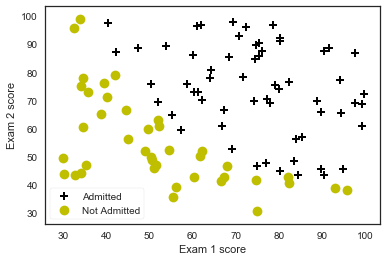

In [24]:
plotData(data,'Exam 1 score','Exam 2 score', 'Admitted', 'Not Admitted')

# Logistic regression using sklearn

### Train Test Split

In [29]:
from sklearn.model_selection import train_test_split

In [30]:
X_train, X_test, y_train, y_test = train_test_split(data[:,0:2],data[:,2],test_size=0.20, random_state=0)

### Fit a model

In [36]:
from sklearn.linear_model import LogisticRegression

In [37]:
regr = LogisticRegression()
regr.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [50]:
predictions = regr.predict(X_test)
score = regr.score(X_test,y_test)
score

0.95

In [48]:
from sklearn import metrics
cm = metrics.confusion_matrix(y_test,predictions)
cm

array([[ 7,  1],
       [ 0, 12]])

Text(0.5,1,'Accuracy Score: 0.95')

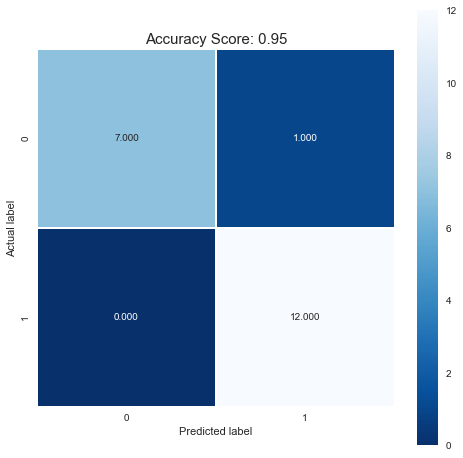

In [57]:
plt.figure(figsize=(8,8))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
t = 'Accuracy Score: {0}'.format(score)
plt.title(t, size=15)